#### Унитарное кодирование

Преобразование категориального признака в несколько бинарных признаков

#### Загрузка набора дынных, преобразование данных в числовой формат.

In [ ]:
import pandas as pd

countries = pd.read_csv(
    "data/population.csv", index_col="no"
)
#преобразуем данные в числовой формат, удаляем запятые
countries["Population 2020"] = countries["Population 2020"].apply(
    lambda x: int("".join(x.split(",")))
)
countries["Net Change"] = countries["Net Change"].apply(
    lambda x: int("".join(x.split(",")))
)
countries["Yearly Change"] = countries["Yearly Change"].apply(
    lambda x: float("".join(x.rstrip("%")))
)
countries["Land Area (Km²)"] = countries["Land Area (Km²)"].apply(
    lambda x: int("".join(x.split(",")))
)
countries

#### Унитарное кодирование признаков Пол (Sex) и Порт посадки (Embarked)

Кодирование

In [12]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# encoder = OneHotEncoder(sparse_output=False, drop="first")

# encoded_values = encoder.fit_transform(titanic[["Embarked", "Sex"]])

# encoded_columns = encoder.get_feature_names_out(["Embarked", "Sex"])

# encoded_values_df = pd.DataFrame(encoded_values, columns=encoded_columns)

# encoded_values_df

Добавление признаков в исходный Dataframe

In [37]:
# titanic = pd.concat([titanic, encoded_values_df], axis=1)

# titanic

#### Дискретизация признаков

Равномерное разделение данных на 3 группы. первый вывод - ограничения по площади, второй - колво стран в каждой группе


In [10]:
labels = ["Small", "Middle", "Big"]
num_bins = 3

In [ ]:
hist1, bins1 = np.histogram(
    countries["Land Area (Km²)"].fillna(countries["Land Area (Km²)"].median()), bins=num_bins
)
bins1, hist1

In [ ]:
pd.concat(
    [
        countries["Country (or dependency)"],
        countries["Land Area (Km²)"],
        pd.cut(countries["Land Area (Km²)"], list(bins1)),
    ],
    axis=1,
).head(20)

In [ ]:
pd.concat(
    [
        countries["Country (or dependency)"],
        countries["Land Area (Km²)"],
        pd.cut(countries["Land Area (Km²)"], list(bins1), labels=labels),
    ],
    axis=1,
).head(20)

Равномерное разделение данных на 3 группы c установкой собственной границы диапазона значений (от 0 до 100)

In [ ]:
labels = ["Small", "Middle", "Big"]
bins2 = np.linspace(0, 12000000, 4)

tmp_bins2 = np.digitize(
    countries["Land Area (Km²)"].fillna(countries["Land Area (Km²)"].median()), bins2
)

hist2 = np.bincount(tmp_bins2 - 1)

bins2, hist2

In [ ]:
pd.concat(
    [
        countries["Country (or dependency)"],
        countries["Land Area (Km²)"],
        pd.cut(countries["Land Area (Km²)"], list(bins2)),
    ],
    axis=1,
).head(20)

In [ ]:
pd.concat(
    [
        countries["Country (or dependency)"],
        countries["Land Area (Km²)"],
        pd.cut(countries["Land Area (Km²)"], list(bins2), labels=labels),
    ],
    axis=1,
).head(20)

Равномерное разделение данных на 3 группы c установкой собственных интервалов (0 - 39, 40 - 60, 61 - 100)

In [ ]:
labels2 = ["Dwarf", "Small", "Middle", "Big", "Giant"]
hist3, bins3 = np.histogram(
    countries["Land Area (Km²)"].fillna(countries["Land Area (Km²)"].median()),
    bins=[0, 1000, 100000, 500000, 3000000, np.inf],
)


bins3, hist3

In [ ]:
pd.concat(
    [
        countries["Country (or dependency)"],
        countries["Land Area (Km²)"],
        pd.cut(countries["Land Area (Km²)"], list(bins3)),
    ],
    axis=1,
).head(20)

In [ ]:
pd.concat(
    [
        countries["Country (or dependency)"],
        countries["Land Area (Km²)"],
        pd.cut(countries["Land Area (Km²)"], list(bins3), labels=labels2),
    ],
    axis=1,
).head(20)

Квантильное разделение данных на 5 групп


In [ ]:
pd.concat(
    [
        countries["Country (or dependency)"],
        countries["Land Area (Km²)"],
        pd.qcut(countries["Land Area (Km²)"], q=5, labels=False),
    ],
    axis=1,
).head(20)

In [ ]:
pd.concat(
    [
        countries["Country (or dependency)"],
        countries["Land Area (Km²)"],
        pd.qcut(countries["Land Area (Km²)"], q=5, labels=labels2),
    ],
    axis=1,
).head(20)

#### Пример конструирования признаков на основе существующих

Title - обращение к пассажиру (Mr, Mrs, Miss)

Is_married - замужняя ли женщина

Cabin_type - палуба (тип каюты)

In [50]:
# titanic_cl = titanic.drop(
#     ["Embarked_Q", "Embarked_S", "Embarked_nan", "Sex_male"], axis=1, errors="ignore"
# )
# titanic_cl = titanic_cl.dropna()

# titanic_cl["Title"] = [
#     i.split(",")[1].split(".")[0].strip() for i in titanic_cl["Name"]
# ]

# titanic_cl["Is_married"] = [1 if i == "Mrs" else 0 for i in titanic_cl["Title"]]

# titanic_cl["Cabin_type"] = [i[0] for i in titanic_cl["Cabin"]]

# titanic_cl

#### Пример использования библиотеки Featuretools для автоматического конструирования (синтеза) признаков

https://featuretools.alteryx.com/en/stable/getting_started/using_entitysets.html

#### Загрузка данных

За основу был взят набор данных "Ecommerce Orders Data Set" из Kaggle

Используется только 100 первых заказов и связанные с ними объекты

https://www.kaggle.com/datasets/sangamsharmait/ecommerce-orders-data-analysis

In [32]:
import featuretools as ft
from woodwork.logical_types import Categorical, Datetime

info = pd.read_csv("data/population.csv")
forcast = pd.read_csv("data/forcast.csv")
capitals = pd.read_csv("data/country.csv", encoding="ISO-8859-1")
forcast["Population"] = forcast["Population"].apply(
    lambda x: int("".join(x.split(",")))
)
forcast["YearlyPer"] = forcast["YearlyPer"].apply(
    lambda x: float("".join(x.rstrip("%")))
)
forcast["Yearly"] = forcast["Yearly"].apply(
    lambda x: int("".join(x.split(",")))
)
info = info.drop(
    ["Migrants (net)", "Fert. Rate", "MedAge", "Urban Pop %", "World Share"], axis=1
)
info["Population 2020"] = info["Population 2020"].apply(
    lambda x: int("".join(x.split(",")))
)
info["Yearly Change"] = info["Yearly Change"].apply(
    lambda x: float("".join(x.rstrip("%")))
)
info["Net Change"] = info["Net Change"].apply(
    lambda x: int("".join(x.split(",")))
)
info["Land Area (Km²)"] = info["Land Area (Km²)"].apply(
    lambda x: int("".join(x.split(",")))
)

info, forcast, capitals

(      no Country (or dependency)  Population 2020  Yearly Change  Net Change  \
 0      1                   China       1439323776           0.39     5540090   
 1      2                   India       1380004385           0.99    13586631   
 2      3           United States        331002651           0.59     1937734   
 3      4               Indonesia        273523615           1.07     2898047   
 4      5                Pakistan        220892340           2.00     4327022   
 ..   ...                     ...              ...            ...         ...   
 230  231              Montserrat             4992           0.06           3   
 231  232        Falkland Islands             3480           3.05         103   
 232  233                    Niue             1626           0.68          11   
 233  234                 Tokelau             1357           1.27          17   
 234  235                Holy See              801           0.25           2   
 
     Density(P/Km²)  Land 

#### Создание сущностей в featuretools

Добавление dataframe'ов с данными в EntitySet с указанием параметров: название сущности (таблицы), первичный ключ, категориальные атрибуты (в том числе даты)

In [34]:
es = ft.EntitySet(id="countries")

es = es.add_dataframe(
    dataframe_name="countries",
    dataframe=info,
    index="no",
    logical_types={
        "Country (or dependency)": Categorical,
    },
)
es = es.add_dataframe(
    dataframe_name="capitals",
    dataframe=capitals,
    index="Country/Territory",
    logical_types={
        "Country/Territory": Categorical,
        "Capital": Categorical,
        "Continent": Categorical,
    },
)
es = es.add_dataframe(
    dataframe_name="forcast",
    dataframe=forcast,
    index="forcast_id",
    make_index=True,
    logical_types={
        "Year": Datetime,
    },
)

es

c:\Users\1\Desktop\улгту\3 курс\МИИ\mai\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\1\Desktop\улгту\3 курс\МИИ\mai\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


Entityset: countries
  DataFrames:
    countries [Rows: 235, Columns: 7]
    capitals [Rows: 234, Columns: 3]
    forcast [Rows: 7, Columns: 8]
  Relationships:
    No relationships

#### Настройка связей между сущностями featuretools

Настройка связей между таблицами на уровне ключей

Связь указывается от родителя к потомкам (таблица-родитель, первичный ключ, таблица-потомок, внешний ключ)

In [35]:
es = es.add_relationship(
    "capitals", "Country/Territory", "countries", "Country (or dependency)"
)

es

Entityset: countries
  DataFrames:
    countries [Rows: 235, Columns: 7]
    capitals [Rows: 234, Columns: 3]
    forcast [Rows: 7, Columns: 8]
  Relationships:
    countries.Country (or dependency) -> capitals.Country/Territory

#### Автоматическое конструирование признаков с помощью featuretools

Библиотека применят различные функции агрегации и трансформации к атрибутам таблицы order_items с учетом отношений

Результат помещается в Dataframe feature_matrix

In [36]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="countries",
    max_depth=1,
)

feature_matrix

Country (or dependency)  Population 2020  Yearly Change  Net Change  \
no                                                                        
1                     China       1439323776           0.39     5540090   
2                     India       1380004385           0.99    13586631   
3             United States        331002651           0.59     1937734   
4                 Indonesia        273523615           1.07     2898047   
5                  Pakistan        220892340           2.00     4327022   
..                      ...              ...            ...         ...   
231              Montserrat             4992           0.06           3   
232        Falkland Islands             3480           3.05         103   
233                    Niue             1626           0.68          11   
234                 Tokelau             1357           1.27          17   
235                Holy See              801           0.25           2   

     Land Area (Km²)  capitals.Capital capitals.Continent  
no                                                         
1            9388211           Beijing               Asia  
2            2973190         New Delhi               Asia  
3            9147420  Washington, D.C.      North America  
4            1811570           Jakarta               Asia  
5             770880         Islamabad               Asia  
..               ...               ...                ...  
231              100            Brades      North America  
232            12170           Stanley      South America  
233              260             Alofi            Oceania  
234               10          Nukunonu            Oceania  
235                0               NaN                NaN  

[235 rows x 7 columns]

#### Полученные признаки

Список колонок полученного dataframe'а

In [37]:
feature_defs

[<Feature: Country (or dependency)>,
 <Feature: Population 2020>,
 <Feature: Yearly Change>,
 <Feature: Net Change>,
 <Feature: Land Area (Km²)>,
 <Feature: capitals.Capital>,
 <Feature: capitals.Continent>]

#### Отсечение значений признаков

Определение выбросов с помощью boxplot

<Axes: >

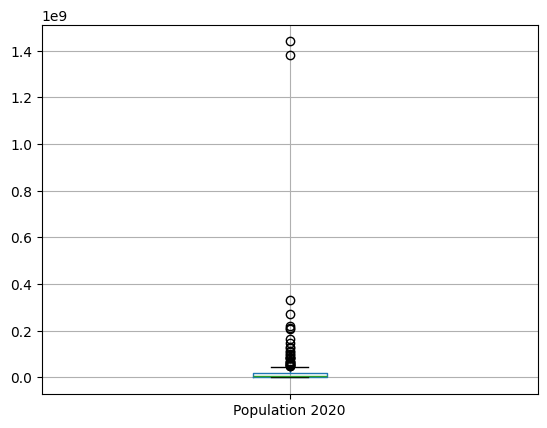

In [38]:
countries.boxplot(column="Population 2020")

Отсечение данных для признака Возраст, значение которых больше 65 лет

In [40]:
countries_norm = countries.copy()

countries_norm["Population Clip"] = countries_norm["Population 2020"].clip(0, 50000000);

countries_norm[countries_norm["Population 2020"] > 50000000][
    ["Country (or dependency)", "Population 2020", "Population Clip"]
]

Country (or dependency)  Population 2020  Population Clip
no                                                          
1                    China       1439323776         50000000
2                    India       1380004385         50000000
3            United States        331002651         50000000
4                Indonesia        273523615         50000000
5                 Pakistan        220892340         50000000
6                   Brazil        212559417         50000000
7                  Nigeria        206139589         50000000
8               Bangladesh        164689383         50000000
9                   Russia        145934462         50000000
10                  Mexico        128932753         50000000
11                   Japan        126476461         50000000
12                Ethiopia        114963588         50000000
13             Philippines        109581078         50000000
14                   Egypt        102334404         50000000
15                 Vietnam         97338579         50000000
16                DR Congo         89561403         50000000
17                  Turkey         84339067         50000000
18                    Iran         83992949         50000000
19                 Germany         83783942         50000000
20                Thailand         69799978         50000000
21          United Kingdom         67886011         50000000
22                  France         65273511         50000000
23                   Italy         60461826         50000000
24                Tanzania         59734218         50000000
25            South Africa         59308690         50000000
26                 Myanmar         54409800         50000000
27                   Kenya         53771296         50000000
28             South Korea         51269185         50000000
29                Colombia         50882891         50000000

Винсоризация признака Возраст

In [41]:
from scipy.stats.mstats import winsorize

print(countries_norm["Population 2020"].quantile(q=0.95))

countries_norm["PopulationWinsorized"] = winsorize(
    countries_norm["Population 2020"].fillna(countries_norm["Population 2020"].mean()),
    (0, 0.05),
    inplace=False,
)

countries_norm[countries_norm["Population 2020"] > 50000000][
    ["Country (or dependency)", "Population 2020", "PopulationWinsorized"]
]

111195830.99999991


Country (or dependency)  Population 2020  PopulationWinsorized
no                                                               
1                    China       1439323776             114963588
2                    India       1380004385             114963588
3            United States        331002651             114963588
4                Indonesia        273523615             114963588
5                 Pakistan        220892340             114963588
6                   Brazil        212559417             114963588
7                  Nigeria        206139589             114963588
8               Bangladesh        164689383             114963588
9                   Russia        145934462             114963588
10                  Mexico        128932753             114963588
11                   Japan        126476461             114963588
12                Ethiopia        114963588             114963588
13             Philippines        109581078             109581078
14                   Egypt        102334404             102334404
15                 Vietnam         97338579              97338579
16                DR Congo         89561403              89561403
17                  Turkey         84339067              84339067
18                    Iran         83992949              83992949
19                 Germany         83783942              83783942
20                Thailand         69799978              69799978
21          United Kingdom         67886011              67886011
22                  France         65273511              65273511
23                   Italy         60461826              60461826
24                Tanzania         59734218              59734218
25            South Africa         59308690              59308690
26                 Myanmar         54409800              54409800
27                   Kenya         53771296              53771296
28             South Korea         51269185              51269185
29                Colombia         50882891              50882891

#### Нормализация значений

In [43]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler_2 = preprocessing.MinMaxScaler(feature_range=(-1, 1))

countries_norm["PopulationNorm"] = min_max_scaler.fit_transform(
    countries_norm["Population 2020"].to_numpy().reshape(-1, 1)
).reshape(countries_norm["Population 2020"].shape)

countries_norm["PopulationClipNorm"] = min_max_scaler.fit_transform(
    countries_norm["Population Clip"].to_numpy().reshape(-1, 1)
).reshape(countries_norm["Population 2020"].shape)

countries_norm["PopulationWinsorizedNorm"] = min_max_scaler.fit_transform(
    countries_norm["PopulationWinsorized"].to_numpy().reshape(-1, 1)
).reshape(countries_norm["Population 2020"].shape)

countries_norm["PopulationWinsorizedNorm2"] = min_max_scaler_2.fit_transform(
    countries_norm["PopulationWinsorized"].to_numpy().reshape(-1, 1)
).reshape(countries_norm["Population 2020"].shape)

countries_norm[
    [
        "Country (or dependency)",
        "Population 2020",
        "PopulationNorm",
        "PopulationClipNorm",
        "PopulationWinsorizedNorm",
        "PopulationWinsorizedNorm2",
    ]
]

Country (or dependency)  Population 2020  PopulationNorm  \
no                                                             
1                     China       1439323776    1.000000e+00   
2                     India       1380004385    9.587866e-01   
3             United States        331002651    2.299705e-01   
4                 Indonesia        273523615    1.900357e-01   
5                  Pakistan        220892340    1.534691e-01   
..                      ...              ...             ...   
231              Montserrat             4992    2.911786e-06   
232        Falkland Islands             3480    1.861292e-06   
233                    Niue             1626    5.731862e-07   
234                 Tokelau             1357    3.862927e-07   
235                Holy See              801    0.000000e+00   

     PopulationClipNorm  PopulationWinsorizedNorm  PopulationWinsorizedNorm2  
no                                                                            
1              1.000000                  1.000000                   1.000000  
2              1.000000                  1.000000                   1.000000  
3              1.000000                  1.000000                   1.000000  
4              1.000000                  1.000000                   1.000000  
5              1.000000                  1.000000                   1.000000  
..                  ...                       ...                        ...  
231            0.000084                  0.000036                  -0.999927  
232            0.000054                  0.000023                  -0.999953  
233            0.000017                  0.000007                  -0.999986  
234            0.000011                  0.000005                  -0.999990  
235            0.000000                  0.000000                  -1.000000  

[235 rows x 6 columns]

#### Стандартизация значений

In [44]:
from sklearn import preprocessing

stndart_scaler = preprocessing.StandardScaler()

countries_norm["PopulationStand"] = stndart_scaler.fit_transform(
    countries_norm["Population 2020"].to_numpy().reshape(-1, 1)
).reshape(countries_norm["Population 2020"].shape)

countries_norm["PopulationClipStand"] = stndart_scaler.fit_transform(
    countries_norm["Population Clip"].to_numpy().reshape(-1, 1)
).reshape(countries_norm["Population 2020"].shape)

countries_norm["PopulationWinsorizedStand"] = stndart_scaler.fit_transform(
    countries_norm["PopulationWinsorized"].to_numpy().reshape(-1, 1)
).reshape(countries_norm["Population 2020"].shape)

countries_norm[
    [
        "Country (or dependency)",
        "Population 2020",
        "PopulationStand",
        "PopulationClipStand",
        "PopulationWinsorizedStand",
    ]
]

Country (or dependency)  Population 2020  PopulationStand  \
no                                                              
1                     China       1439323776        10.427597   
2                     India       1380004385         9.987702   
3             United States        331002651         2.208627   
4                 Indonesia        273523615         1.782380   
5                  Pakistan        220892340         1.392082   
..                      ...              ...              ...   
231              Montserrat             4992        -0.245950   
232        Falkland Islands             3480        -0.245962   
233                    Niue             1626        -0.245975   
234                 Tokelau             1357        -0.245977   
235                Holy See              801        -0.245982   

     PopulationClipStand  PopulationWinsorizedStand  
no                                                   
1               2.073933                   3.171659  
2               2.073933                   3.171659  
3               2.073933                   3.171659  
4               2.073933                   3.171659  
5               2.073933                   3.171659  
..                   ...                        ...  
231            -0.795071                  -0.621969  
232            -0.795158                  -0.622019  
233            -0.795265                  -0.622080  
234            -0.795280                  -0.622089  
235            -0.795312                  -0.622107  

[235 rows x 5 columns]